In [1]:
%load_ext autoreload
%autoreload 2
%run ../src/notebook_env.py

In [2]:
from ds_utils import *

In [3]:
def plot_training_history(data):
    loss_train_list = data['loss_train']
    loss_test_list = data['loss_val']
    acc_test_list = data['acc_val']
    epochs = len(loss_train_list)

    fig,ax = plt.subplots()
    ax.plot(range(len(loss_train_list)),loss_train_list)
    ax.plot(range(len(loss_test_list)),loss_test_list)
    plt.title('Loss')
    

    fig,ax = plt.subplots()
    ax.plot(range(len(acc_test_list)),acc_test_list)
    plt.title('Test accuracy')

In [4]:
def show_dataloader(data,loader_name,encoding_dict):
    if loader_name == 'train_data':
        print('Train')
    elif loader_name == 'val_data':
        print('Validation')
        
    loader = data[loader_name]
    y_encoded = loader.dataset.y
    size_train = len(y_encoded)
    
    data_dict = {encoding_dict[k]:v for k,v in get_imgs_per_cat(y_encoded).items()}
    print(f'number of images: {size_train}')
    print('Percentage of images in each category:\n') 
    for k,v in data_dict.items():
        print('{}: {:.6g} %'.format(k,100.0*v/size_train)) 
        
    return 


In [5]:
#to do: include early stopping
# padding the vectors to the maximum number of epochs

#read simple split
def read_info_split(split_path,plot = False,show=False):

    training_info_path = os.path.join(split_path,'training_info.pth')
    try:
        training_info = torch.load(training_info_path)
    except:
        training_info = {}
        
    output_dict = {}
        
    if training_info:
        
        try:
            encoding_dict = training_info['encoding_dict']
        except:
            encoding_dict = None
            
        
        #print(training_info.keys())
        #model_name = training_info['model_name']
        
        #training history
        #loss_train = np.array(training_info['loss_train'])
        loss_val = np.array(training_info['loss_val'])
        acc_val = np.array(training_info['acc_val'])
        f1_val = np.array(training_info['f1_val'])
        precision_val = np.array(training_info['precision_val'])
        recall_val = np.array(training_info['recall_val'])
        sensitivity_val = np.array(training_info['sensitivity_val'])
        specificity_val = np.array(training_info['specificity_val'])
        
        
        #epochs = training_info['epochs']
        
        loss_test = training_info['loss_test']
        acc_test = training_info['acc_test']
        f1_test = training_info['f1_test']
        precision_test = training_info['precision_test']
        recall_test = training_info['recall_test']
        sensitivity_test = np.array(training_info['sensitivity_test'])
        specificity_test = np.array(training_info['specificity_test'])
        confusion_matrix_test = training_info['confusion_matrix_test']
                
        
        #print(epochs)

        i = np.argmin(loss_val)
        min_loss = loss_val[i]
        #encoding_dict = training_info['encoding_dict']
        
        if show:
            #print(f'model_name: {model_name}')
            print(f'min loss: {min_loss} at epoch {i}')
            
            print(f'acc_test: {loss_test}')
            print(f'acc_test: {acc_test}')
            print(f'confusion matrix test: ')
            print(confusion_matrix_test)
            #print(f'encoding_dict = {encoding_dict}')
            #show_dataloader(training_info,'test_data',encoding_dict)
        
        output_dict.update({'encoding_dict':encoding_dict,
                            'loss_val':loss_val,'acc_val':acc_val,'f1_val':f1_val,
                            'precision_val':precision_val,'recall_val':recall_val,
                            'sensitivity_val':sensitivity_val,'specificity_val':specificity_val,
                            'loss_test':loss_test,'acc_test':acc_test,'f1_test':f1_test,
                            'precision_test':precision_test,'recall_test':recall_test,
                            'sensitivity_test':sensitivity_test,'specificity_test':specificity_test,
                            'confusion_matrix_test':confusion_matrix_test})
        if plot:
            plot_training_history(training_info)
            
    return output_dict

    
    
    
#split_path = '/projects/sortifier/experimental/nilt_crossvalidation_lr_0,001/split_1'
#read_info_split(split_path,show=True,plot = True)



In [6]:
#training crossvalidation
def read_training_history(results_path):
    split_list = os.listdir(results_path)
    confusion_matrix_test = []
    for i,split in enumerate(split_list):
        encoding_dict = None
        split_path = os.path.join(results_path,split)
        _metrics_dict = read_info_split(split_path)
        if _metrics_dict:
            #epochs = _metrics_dict['epochs']
            epochs = 100
            try:
                encoding_dict = _metrics_dict['encoding_dict']
            except:
                encoding_dict = None
            
            confusion_matrix_test.append(_metrics_dict['confusion_matrix_test'])
            
            if i == 0:
                #loss_train = _metrics_dict['loss_train']
                loss_val = _metrics_dict['loss_val']
                acc_val = _metrics_dict['acc_val']
                f1_val = _metrics_dict['f1_val']
                precision_val = _metrics_dict['precision_val']
                recall_val = _metrics_dict['recall_val']
                sensitivity_val = _metrics_dict['sensitivity_val']
                specificity_val = _metrics_dict['specificity_val']
                
                
                                
                #loss_train = np.pad(loss_train,(0,epochs-loss_train.shape[0]),'minimum')
                loss_val = np.pad(loss_val,(0,epochs-loss_val.shape[0]),'minimum')
                acc_val = np.pad(acc_val,(0,epochs-acc_val.shape[0]),'maximum')
                f1_val = np.pad(f1_val,(0,epochs-f1_val.shape[0]),'maximum')
                precision_val = np.pad(precision_val,(0,epochs-precision_val.shape[0]),'maximum')
                recall_val = np.pad(recall_val,(0,epochs-recall_val.shape[0]),'maximum')
                sensitivity_val = np.pad(sensitivity_val,(0,epochs-sensitivity_val.shape[0]),'maximum')
                specificity_val = np.pad(specificity_val,(0,epochs-specificity_val.shape[0]),'maximum')
                           
                acc_test = np.array(_metrics_dict['acc_test'])
                f1_test = np.array(_metrics_dict['f1_test'])
                precision_test = np.array(_metrics_dict['precision_test'])
                recall_test = np.array(_metrics_dict['recall_test'])
                sensitivity_test = np.array(_metrics_dict['sensitivity_test'])
                specificity_test = np.array(_metrics_dict['specificity_test'])
                loss_test = np.array(_metrics_dict['loss_test'])
                #confusion_matrix_test = np.array(_metrics_dict['confusion_matrix_test'])
                 
                
            else:
                
                #_loss_train = _metrics_dict['loss_train']
                _loss_val = _metrics_dict['loss_val']
                _acc_val = _metrics_dict['acc_val']
                _f1_val = _metrics_dict['f1_val']
                _precision_val = _metrics_dict['precision_val']
                _recall_val = _metrics_dict['recall_val']
                _sensitivity_val = _metrics_dict['sensitivity_val']
                _specificity_val = _metrics_dict['specificity_val']
                
                # _loss_train = np.pad(_loss_train,(0,epochs-_loss_train.shape[0]),'minimum')
                _loss_val = np.pad(_loss_val,(0,epochs-_loss_val.shape[0]),'minimum')
                _acc_val = np.pad(_acc_val,(0,epochs-_acc_val.shape[0]),'maximum')
                _f1_val = np.pad(_f1_val,(0,epochs-_f1_val.shape[0]),'maximum')
                _precision_val = np.pad(_precision_val,(0,epochs-_precision_val.shape[0]),'maximum')
                _recall_val = np.pad(_recall_val,(0,epochs-_recall_val.shape[0]),'maximum')
                _sensitivity_val = np.pad(_sensitivity_val,(0,epochs-_sensitivity_val.shape[0]),'maximum')
                _specificity_val = np.pad(_specificity_val,(0,epochs-_specificity_val.shape[0]),'maximum')
                           
                
                    
                #loss_train = np.vstack([loss_train, _loss_train])
                loss_val = np.vstack([loss_val, _loss_val])
                acc_val = np.vstack([acc_val, _acc_val])
                f1_val = np.vstack([f1_val, _f1_val])
                precision_val = np.vstack([precision_val, _precision_val])
                recall_val = np.vstack([recall_val, _recall_val])
                sensitivity_val = np.vstack([sensitivity_val, _sensitivity_val])
                specificity_val = np.vstack([specificity_val, _specificity_val])
                
                
                _acc_test = np.array(_metrics_dict['acc_test'])
                _f1_test = np.array(_metrics_dict['f1_test'])
                _precision_test = np.array(_metrics_dict['precision_test'])
                _recall_test = np.array(_metrics_dict['recall_test'])
                _sensitivity_test = np.array(_metrics_dict['sensitivity_test'])
                _specificity_test = np.array(_metrics_dict['specificity_test'])
                _loss_test = np.array(_metrics_dict['loss_test'])
                #_confusion_matrix_test = np.array(_metrics_dict['confusion_matrix_test'])
                
                acc_test = np.vstack([acc_test, _acc_test])
                f1_test = np.vstack([f1_test, _f1_test])
                precision_test = np.vstack([precision_test, _precision_test])
                recall_test = np.vstack([recall_test, _recall_test])
                sensitivity_test = np.vstack([sensitivity_test, _sensitivity_test])
                specificity_test = np.vstack([specificity_test, _specificity_test])
                loss_test = np.vstack([loss_test, _loss_test])
                #confusion_matrix_test = np.concatenate((confusion_matrix_test, _confusion_matrix_test),axis=0)
                
    
    return {'encoding_dict':encoding_dict,'loss_val':loss_val,'acc_val':acc_val,'f1_val':f1_val,'precision_val':precision_val,'recall_val':recall_val,
            'sensitivity_val':sensitivity_val,'specificity_val':specificity_val,
            'acc_test':acc_test,'f1_test':f1_test, 'precision_test':precision_test, 'recall_test':recall_test,
            'sensitivity_test':sensitivity_test,'specificity_test':specificity_test,
            'loss_test':loss_test,'confusion_matrix_test':confusion_matrix_test}

def mean_std_metric(metric):
    mean = np.mean(metric,axis=0)
    std = np.std(metric,axis=0)
    return mean, std

def plot_mean_std(metrics_dict,title,fontsize=20):
    
    fig,ax = plt.subplots(figsize = (10,10))
    for k,v in metrics_dict.items():
        mean, std = mean_std_metric(v)
        ax.plot(mean,label = k)
        ax.fill_between(range(mean.shape[0]), mean-std, mean+std, alpha = 0.5)
        ax.set_title(title,fontsize=fontsize)
        ax.set_ylim((0.0,1.0))
        ax.set_xlabel('epochs',fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        plt.legend(fontsize=fontsize)
        ax.grid()
        
        

# results_path = '/home/jcejudo/rd-img-classification-pilot/results/ec_getty'

# output_dict = read_training_history(results_path)   

# cm_list = output_dict['confusion_matrix_test']

# for cm in cm_list:
#     print(cm)

# acc_test_mean, acc_test_std = mean_std_metric(output_dict['acc_test'])
# f1_test_mean, f1_test_std = mean_std_metric(output_dict['f1_test'])


# print(f'acc_test_mean: {acc_test_mean[0]:.3f}')
# print(f'acc_test_std: {acc_test_std[0]:.3f}')

# print(f'f1_test_mean: {f1_test_mean[0]:.3f}')
# print(f'f1_test_std: {f1_test_std[0]:.3f}')

# #plot_mean_std({'loss_train':output_dict['loss_train'],'loss_val':output_dict['loss_val']})
# plot_mean_std({'acc_val_resnet':output_dict['acc_val']},'validation accuracy')       

{0: 'archaeological_site', 1: 'building', 2: 'ceramics', 3: 'clothing', 4: 'costume_accessories', 5: 'drawing', 6: 'furniture', 7: 'inscription', 8: 'jewellery', 9: 'map', 10: 'painting', 11: 'photograph', 12: 'postcard', 13: 'sculpture', 14: 'specimen', 15: 'tapestry', 16: 'textile', 17: 'toy', 18: 'weaponry', 19: 'woodwork'}
resnet
accuracy: 0.852 +- 0.005
f1: 0.854 +- 0.007
precision: 0.856 +- 0.007
sensitivity: 0.855 +- 0.007
specificity: 0.992 +- 0.000


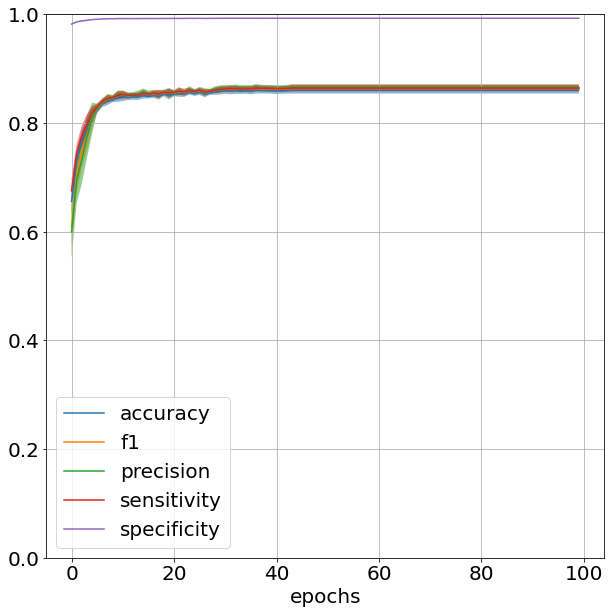

In [7]:
fontsize = 20
results_path = '/home/jcejudo/rd-img-classification-pilot/results/ec_getty'

output_dict_resnet = read_training_history(results_path)  
acc_test_mean, acc_test_std = mean_std_metric(output_dict_resnet['acc_test'])
f1_test_mean, f1_test_std = mean_std_metric(output_dict_resnet['f1_test'])
precision_test_mean, precision_test_std = mean_std_metric(output_dict_resnet['precision_test'])
recall_test_mean, recall_test_std = mean_std_metric(output_dict_resnet['recall_test'])
sensitivity_test_mean, sensitivity_test_std = mean_std_metric(output_dict_resnet['sensitivity_test'])
specificity_test_mean, specificity_test_std = mean_std_metric(output_dict_resnet['specificity_test'])

if output_dict_resnet['encoding_dict']:
    print(output_dict_resnet['encoding_dict'])

print('resnet')
print(f'accuracy: {acc_test_mean[0]:.3f} +- {acc_test_std[0]:.3f}')
print(f'f1: {f1_test_mean[0]:.3f} +- {f1_test_std[0]:.3f}')
print(f'precision: {precision_test_mean[0]:.3f} +- {precision_test_std[0]:.3f}')
print(f'sensitivity: {sensitivity_test_mean[0]:.3f} +- {sensitivity_test_std[0]:.3f}')
print(f'specificity: {specificity_test_mean[0]:.3f} +- {specificity_test_std[0]:.3f}')

plot_mean_std({'accuracy':output_dict_resnet['acc_val'],
               'f1':output_dict_resnet['f1_val'],
               'precision':output_dict_resnet['precision_val'],
               'sensitivity':output_dict_resnet['sensitivity_val'],
               'specificity':output_dict_resnet['specificity_val'],
              },'',fontsize=fontsize)


# cm_list = output_dict_resnet['confusion_matrix_test']
# for i,cm in enumerate(cm_list):
#     print(f'split {i}')
#     print(cm)
#     print()
    

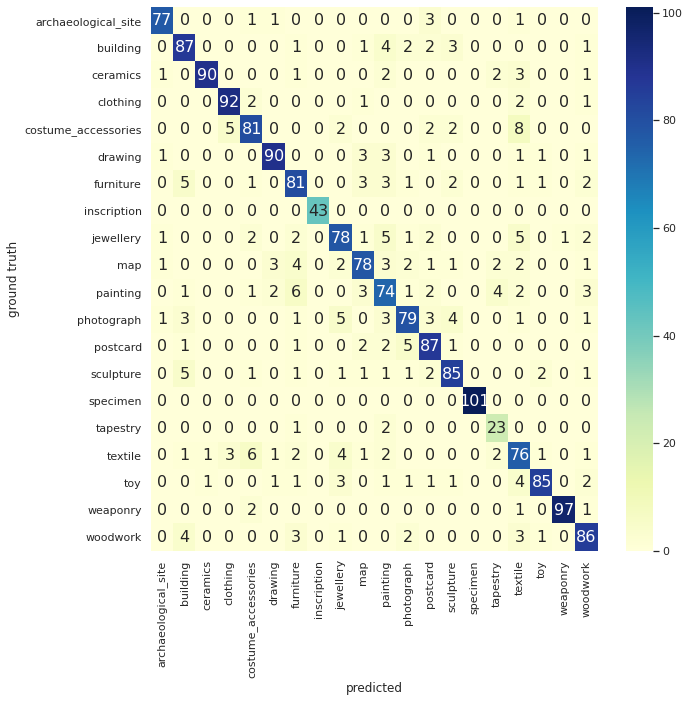

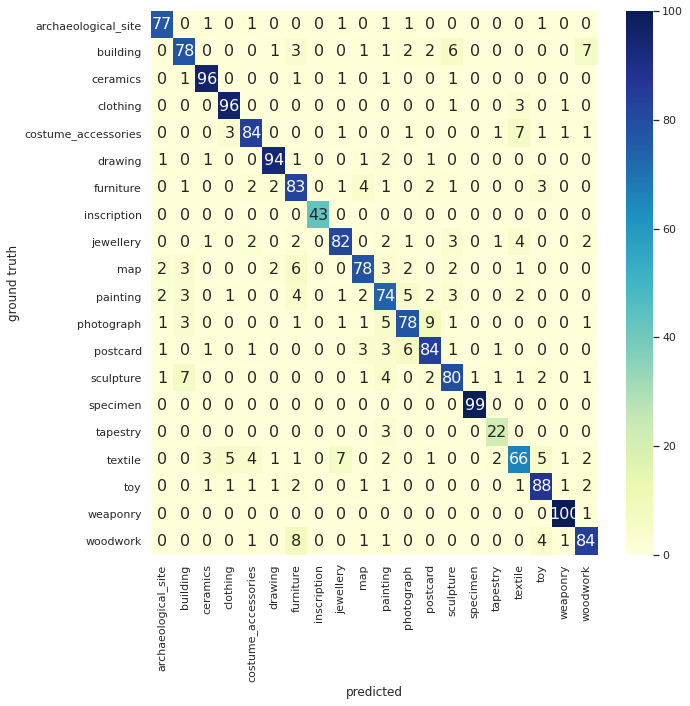

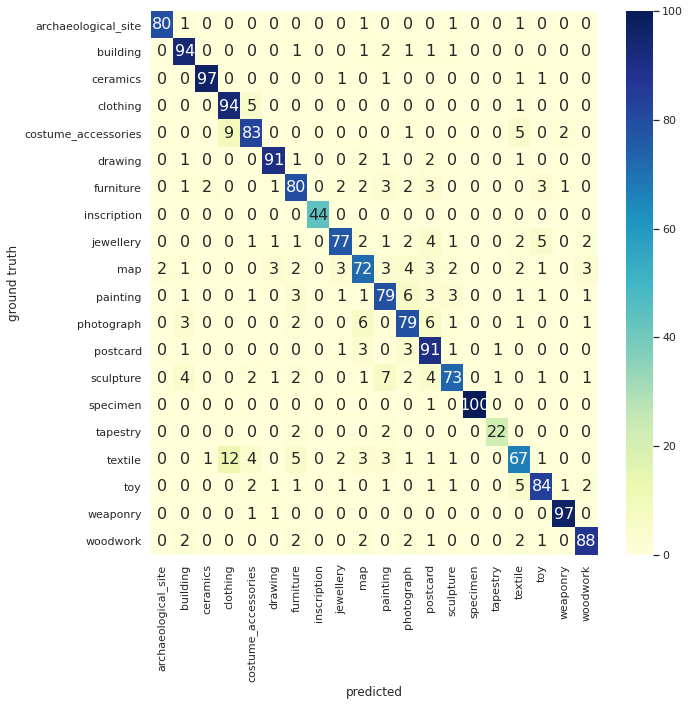

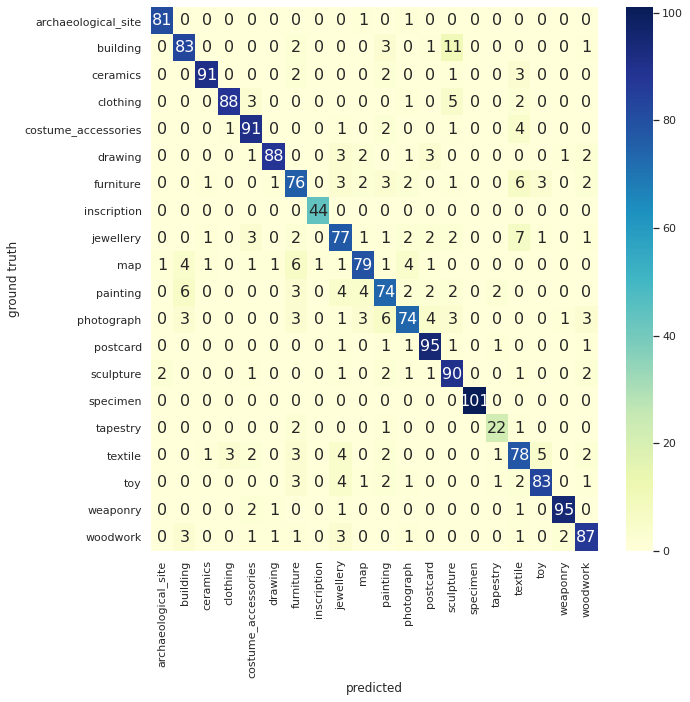

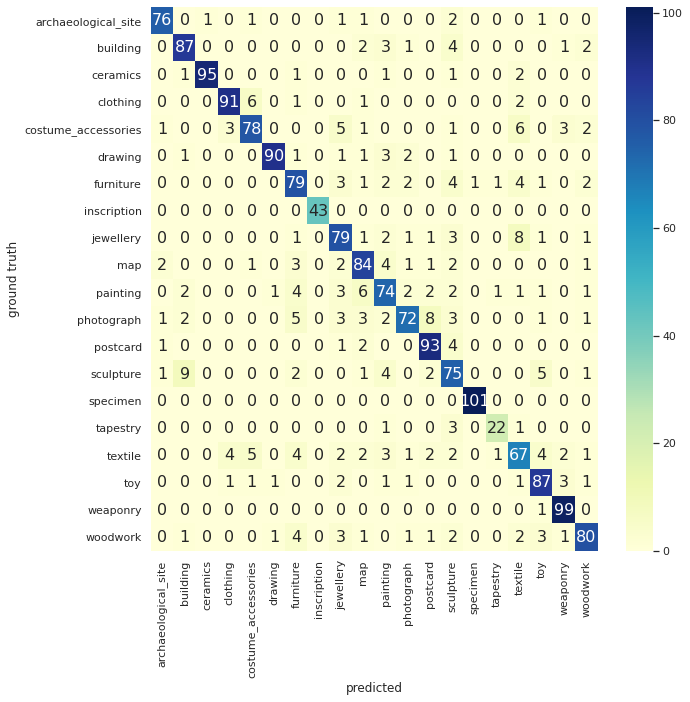

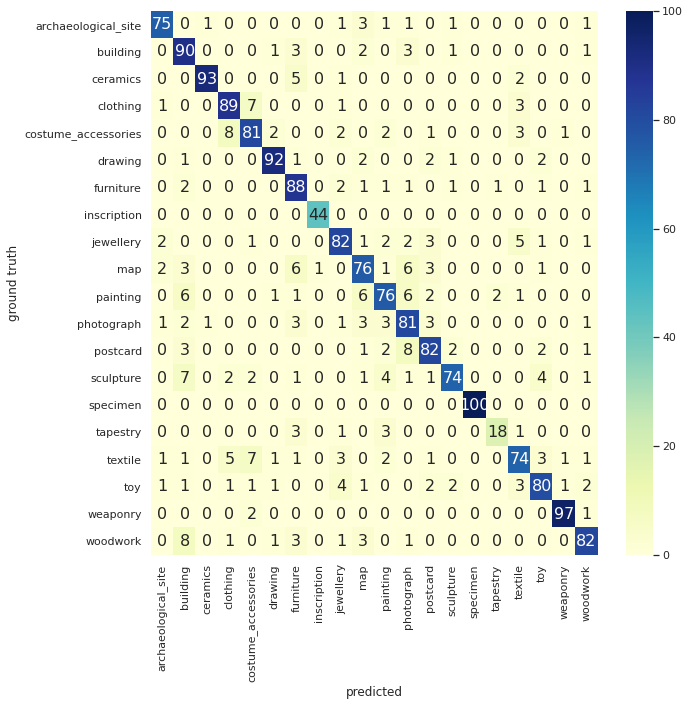

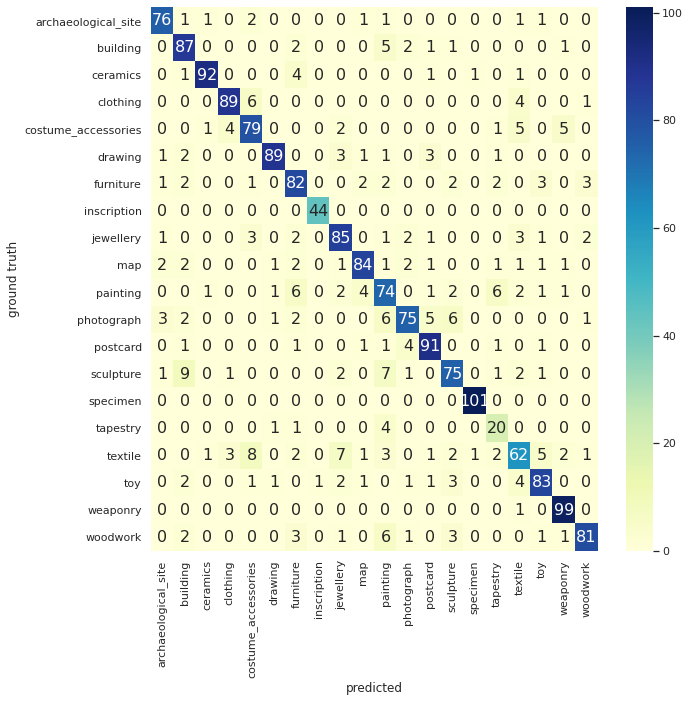

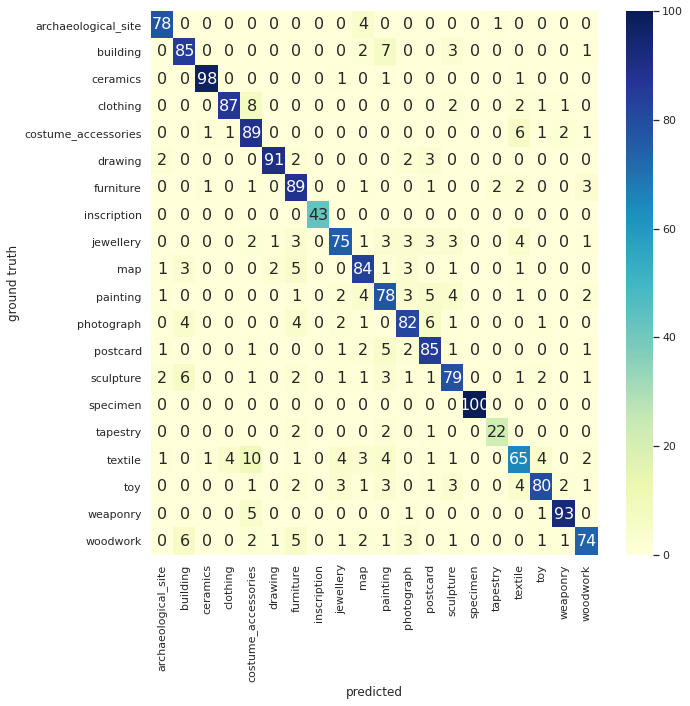

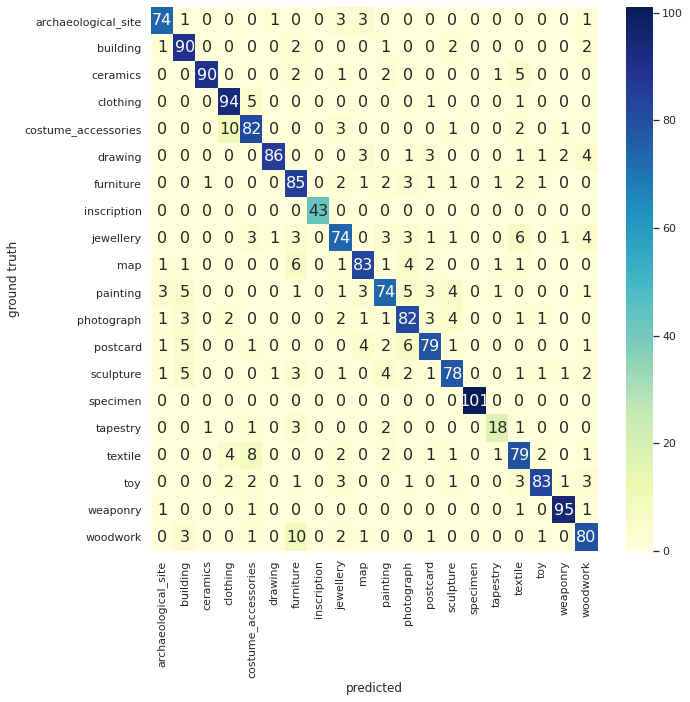

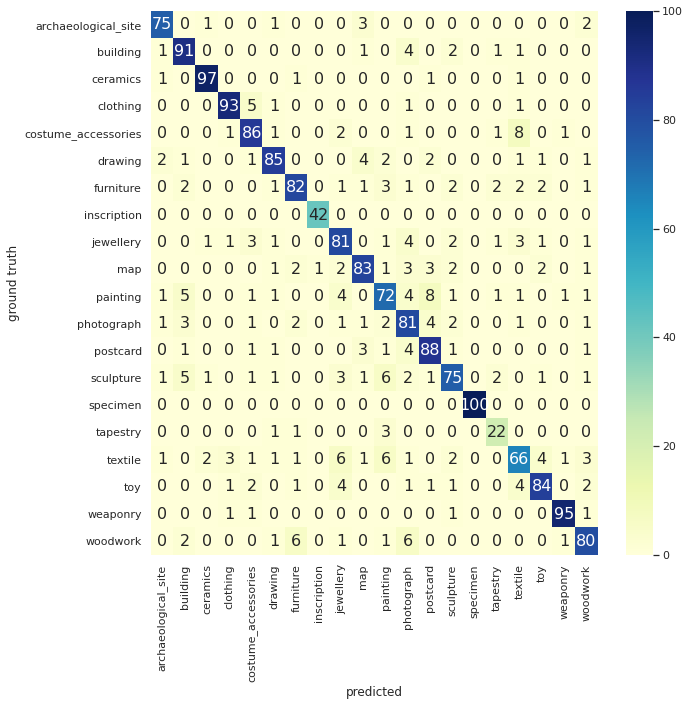

In [8]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


def plot_conf_matrix(array,columns,font_scale=2):

    df_cm = pd.DataFrame(array, index = columns,
                      columns = columns)

    sn.set(font_scale=font_scale)  # crazy big
    plt.figure(figsize = (10,10))
    sn.heatmap(df_cm, annot=True,cmap="YlGnBu",fmt="d",annot_kws={"size": 16})
    plt.xlabel('predicted')
    plt.ylabel('ground truth')

cm_list = output_dict_resnet['confusion_matrix_test']
labels = [output_dict_resnet['encoding_dict'][i] for i in range(cm.shape[0])]
for cm in cm_list:
    plot_conf_matrix(cm,labels,font_scale=1)

In [ ]:
#resnet


fontsize = 30
results_path = '/projects/sortifier/paper_no_cbct/new_metrics_resnet34_28_10_2020'

output_dict_resnet = read_training_history(results_path)  
acc_test_mean, acc_test_std = mean_std_metric(output_dict_resnet['acc_test'])
f1_test_mean, f1_test_std = mean_std_metric(output_dict_resnet['f1_test'])
precision_test_mean, precision_test_std = mean_std_metric(output_dict_resnet['precision_test'])
recall_test_mean, recall_test_std = mean_std_metric(output_dict_resnet['recall_test'])
sensitivity_test_mean, sensitivity_test_std = mean_std_metric(output_dict_resnet['sensitivity_test'])
specificity_test_mean, specificity_test_std = mean_std_metric(output_dict_resnet['specificity_test'])

if output_dict_resnet['encoding_dict']:
    print(output_dict_resnet['encoding_dict'])

print('resnet')
print(f'accuracy: {acc_test_mean[0]:.3f} +- {acc_test_std[0]:.3f}')
print(f'f1: {f1_test_mean[0]:.3f} +- {f1_test_std[0]:.3f}')
print(f'precision: {precision_test_mean[0]:.3f} +- {precision_test_std[0]:.3f}')
print(f'sensitivity: {sensitivity_test_mean[0]:.3f} +- {sensitivity_test_std[0]:.3f}')
print(f'specificity: {specificity_test_mean[0]:.3f} +- {specificity_test_std[0]:.3f}')

plot_mean_std({'accuracy':output_dict_resnet['acc_val'],
               'f1':output_dict_resnet['f1_val'],
               'precision':output_dict_resnet['precision_val'],
               'sensitivity':output_dict_resnet['sensitivity_val'],
               'specificity':output_dict_resnet['specificity_val'],
              },'ResNet',fontsize=fontsize)


cm_list = output_dict_resnet['confusion_matrix_test']
for i,cm in enumerate(cm_list):
    print(f'split {i}')
    print(cm)
    print()
    
    
print(50*'-')   
    
    
#CNN

results_path = '/projects/sortifier/paper_no_cbct/new_metrics_CNN_28_10_2020'

output_dict_resnet = read_training_history(results_path)  
acc_test_mean, acc_test_std = mean_std_metric(output_dict_resnet['acc_test'])
f1_test_mean, f1_test_std = mean_std_metric(output_dict_resnet['f1_test'])
precision_test_mean, precision_test_std = mean_std_metric(output_dict_resnet['precision_test'])
recall_test_mean, recall_test_std = mean_std_metric(output_dict_resnet['recall_test'])
sensitivity_test_mean, sensitivity_test_std = mean_std_metric(output_dict_resnet['sensitivity_test'])
specificity_test_mean, specificity_test_std = mean_std_metric(output_dict_resnet['specificity_test'])

if output_dict_resnet['encoding_dict']:
    print(output_dict_resnet['encoding_dict'])

print('CNN')
print(f'accuracy: {acc_test_mean[0]:.3f} +- {acc_test_std[0]:.3f}')
print(f'f1: {f1_test_mean[0]:.3f} +- {f1_test_std[0]:.3f}')
print(f'precision: {precision_test_mean[0]:.3f} +- {precision_test_std[0]:.3f}')
print(f'sensitivity: {sensitivity_test_mean[0]:.3f} +- {sensitivity_test_std[0]:.3f}')
print(f'specificity: {specificity_test_mean[0]:.3f} +- {specificity_test_std[0]:.3f}')

plot_mean_std({'accuracy':output_dict_resnet['acc_val'],
               'f1':output_dict_resnet['f1_val'],
               'precision':output_dict_resnet['precision_val'],
               'sensitivity':output_dict_resnet['sensitivity_val'],
               'specificity':output_dict_resnet['specificity_val'],
              },'Baseline',fontsize=fontsize)


cm_list = output_dict_resnet['confusion_matrix_test']
for i,cm in enumerate(cm_list):
    print(f'split {i}')
    print(cm)
    print()
    
    
#capsules

results_path = '/projects/sortifier/paper_no_cbct/new_metrics_capsnet_28_10_2020'

output_dict_resnet = read_training_history(results_path)  
acc_test_mean, acc_test_std = mean_std_metric(output_dict_resnet['acc_test'])
f1_test_mean, f1_test_std = mean_std_metric(output_dict_resnet['f1_test'])
precision_test_mean, precision_test_std = mean_std_metric(output_dict_resnet['precision_test'])
recall_test_mean, recall_test_std = mean_std_metric(output_dict_resnet['recall_test'])
sensitivity_test_mean, sensitivity_test_std = mean_std_metric(output_dict_resnet['sensitivity_test'])
specificity_test_mean, specificity_test_std = mean_std_metric(output_dict_resnet['specificity_test'])

if output_dict_resnet['encoding_dict']:
    print(output_dict_resnet['encoding_dict'])

print('capsules')
print(f'accuracy: {acc_test_mean[0]:.3f} +- {acc_test_std[0]:.3f}')
print(f'f1: {f1_test_mean[0]:.3f} +- {f1_test_std[0]:.3f}')
print(f'precision: {precision_test_mean[0]:.3f} +- {precision_test_std[0]:.3f}')
print(f'sensitivity: {sensitivity_test_mean[0]:.3f} +- {sensitivity_test_std[0]:.3f}')
print(f'specificity: {specificity_test_mean[0]:.3f} +- {specificity_test_std[0]:.3f}')

plot_mean_std({'accuracy':output_dict_resnet['acc_val'],
               'f1':output_dict_resnet['f1_val'],
               'precision':output_dict_resnet['precision_val'],
               'sensitivity':output_dict_resnet['sensitivity_val'],
               'specificity':output_dict_resnet['specificity_val'],
              },'CapsNet',fontsize=fontsize)


cm_list = output_dict_resnet['confusion_matrix_test']
for i,cm in enumerate(cm_list):
    print(f'split {i}')
    print(cm)
    print()
    
    
    
    


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


def plot_conf_matrix(array,columns,font_scale=3):

    df_cm = pd.DataFrame(array, index = columns,
                      columns = columns)

    sn.set(font_scale=font_scale)  # crazy big
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True,cmap="YlGnBu",fmt="d")
    plt.xlabel('predicted')
    plt.ylabel('ground truth')

#resnet
array = [[ 736,    0 ,   0 ,   2],
 [   7  ,133,    0  ,  0],
 [   0 ,   0, 1512  ,  2],
 [  10  ,  1  ,  1,  892]]

#baseline

array = [[ 734,    0 ,   0 ,   1],
 [   7,  132 ,   0  ,  0],
 [   1  ,  1, 1510  ,  3],
 [  69  ,  1 ,   3 , 834]]

    
#capsules   
array = [[ 734 ,   0 ,   0   , 3],
 [   5 , 135  ,  0  ,  0],
 [   0  ,  0, 1516  ,  0],
 [  79  ,  0  ,  0 , 824]]

columns = ['bite','ceph', 'pan','per']    
plot_conf_matrix(array,columns)

In [ ]:
results_path = '/projects/sortifier/bite_pan_other_results/new_metrics_resnet34_28_10_2020'

output_dict_resnet = read_training_history(results_path)  
acc_test_mean, acc_test_std = mean_std_metric(output_dict_resnet['acc_test'])
f1_test_mean, f1_test_std = mean_std_metric(output_dict_resnet['f1_test'])
precision_test_mean, precision_test_std = mean_std_metric(output_dict_resnet['precision_test'])
recall_test_mean, recall_test_std = mean_std_metric(output_dict_resnet['recall_test'])
sensitivity_test_mean, sensitivity_test_std = mean_std_metric(output_dict_resnet['sensitivity_test'])
specificity_test_mean, specificity_test_std = mean_std_metric(output_dict_resnet['specificity_test'])



print('resnet')
print(f'accuracy: {acc_test_mean[0]:.3f} +- {acc_test_std[0]:.3f}')
print(f'f1: {f1_test_mean[0]:.3f} +- {f1_test_std[0]:.3f}')
print(f'precision: {precision_test_mean[0]:.3f} +- {precision_test_std[0]:.3f}')
print(f'recall: {recall_test_mean[0]:.3f} +- {recall_test_std[0]:.3f}')
print(f'sensitivity: {sensitivity_test_mean[0]:.3f} +- {sensitivity_test_std[0]:.3f}')
print(f'specificity: {specificity_test_mean[0]:.3f} +- {specificity_test_std[0]:.3f}')


print('\n')


results_path = '/projects/sortifier/paper_no_cbct/new_metrics_CNN_28_10_2020'

output_dict_CNN = read_training_history(results_path)  
acc_test_mean, acc_test_std = mean_std_metric(output_dict_CNN['acc_test'])
f1_test_mean, f1_test_std = mean_std_metric(output_dict_CNN['f1_test'])
precision_test_mean, precision_test_std = mean_std_metric(output_dict_CNN['precision_test'])
recall_test_mean, recall_test_std = mean_std_metric(output_dict_CNN['recall_test'])
sensitivity_test_mean, sensitivity_test_std = mean_std_metric(output_dict_CNN['sensitivity_test'])
specificity_test_mean, specificity_test_std = mean_std_metric(output_dict_CNN['specificity_test'])


print('CNN')
print(f'accuracy: {acc_test_mean[0]:.3f} +- {acc_test_std[0]:.3f}')
print(f'f1: {f1_test_mean[0]:.3f} +- {f1_test_std[0]:.3f}')
print(f'precision: {precision_test_mean[0]:.3f} +- {precision_test_std[0]:.3f}')
print(f'recall: {recall_test_mean[0]:.3f} +- {recall_test_std[0]:.3f}')
print(f'sensitivity: {sensitivity_test_mean[0]:.3f} +- {sensitivity_test_std[0]:.3f}')
print(f'specificity: {specificity_test_mean[0]:.3f} +- {specificity_test_std[0]:.3f}')
print('\n')

results_path = '/projects/sortifier/paper_no_cbct/new_metrics_capsnet_28_10_2020'

output_dict_capsules = read_training_history(results_path)  
acc_test_mean, acc_test_std = mean_std_metric(output_dict_capsules['acc_test'])
f1_test_mean, f1_test_std = mean_std_metric(output_dict_capsules['f1_test'])
precision_test_mean, precision_test_std = mean_std_metric(output_dict_capsules['precision_test'])
recall_test_mean, recall_test_std = mean_std_metric(output_dict_capsules['recall_test'])
sensitivity_test_mean, sensitivity_test_std = mean_std_metric(output_dict_capsules['sensitivity_test'])
specificity_test_mean, specificity_test_std = mean_std_metric(output_dict_capsules['specificity_test'])


print('capsules')
print(f'accuracy: {acc_test_mean[0]:.3f} +- {acc_test_std[0]:.3f}')
print(f'f1: {f1_test_mean[0]:.3f} +- {f1_test_std[0]:.3f}')
print(f'precision: {precision_test_mean[0]:.3f} +- {precision_test_std[0]:.3f}')
print(f'recall: {recall_test_mean[0]:.3f} +- {recall_test_std[0]:.3f}')
print(f'sensitivity: {sensitivity_test_mean[0]:.3f} +- {sensitivity_test_std[0]:.3f}')
print(f'specificity: {specificity_test_mean[0]:.3f} +- {specificity_test_std[0]:.3f}')
print('\n')



plot_mean_std({'CNN':output_dict_CNN['acc_val'],
               'resnet':output_dict_resnet['acc_val'],
              'capsules':output_dict_capsules['acc_val']},'validation accuracy') 

plot_mean_std({'CNN':output_dict_CNN['f1_val'],
               'resnet':output_dict_resnet['f1_val'],
              'capsules':output_dict_capsules['f1_val']},'validation f1') 

plot_mean_std({'CNN':output_dict_CNN['precision_val'],
               'resnet':output_dict_resnet['precision_val'],
              'capsules':output_dict_capsules['precision_val']},'validation precision') 

plot_mean_std({'CNN':output_dict_CNN['recall_val'],
               'resnet':output_dict_resnet['recall_val'],
              'capsules':output_dict_capsules['recall_val']},'validation recall') 

plot_mean_std({'CNN':output_dict_CNN['sensitivity_val'],
               'resnet':output_dict_resnet['sensitivity_val'],
              'capsules':output_dict_capsules['sensitivity_val']},'validation sensitivity') 

plot_mean_std({'CNN':output_dict_CNN['specificity_val'],
               'resnet':output_dict_resnet['specificity_val'],
              'capsules':output_dict_capsules['specificity_val']},'validation specificity') 

In [ ]:
#single model

results_path = '/projects/sortifier/bite_pan_other_results/new_metrics_resnet34_28_10_2020'

output_dict_resnet = read_training_history(results_path)  
acc_test_mean, acc_test_std = mean_std_metric(output_dict_resnet['acc_test'])
f1_test_mean, f1_test_std = mean_std_metric(output_dict_resnet['f1_test'])
precision_test_mean, precision_test_std = mean_std_metric(output_dict_resnet['precision_test'])
recall_test_mean, recall_test_std = mean_std_metric(output_dict_resnet['recall_test'])
sensitivity_test_mean, sensitivity_test_std = mean_std_metric(output_dict_resnet['sensitivity_test'])
specificity_test_mean, specificity_test_std = mean_std_metric(output_dict_resnet['specificity_test'])

if output_dict_resnet['encoding_dict']:
    print(output_dict_resnet['encoding_dict'])

print('resnet')
print(f'accuracy: {acc_test_mean[0]:.3f} +- {acc_test_std[0]:.3f}')
print(f'f1: {f1_test_mean[0]:.3f} +- {f1_test_std[0]:.3f}')
print(f'precision: {precision_test_mean[0]:.3f} +- {precision_test_std[0]:.3f}')
print(f'sensitivity: {sensitivity_test_mean[0]:.3f} +- {sensitivity_test_std[0]:.3f}')
print(f'specificity: {specificity_test_mean[0]:.3f} +- {specificity_test_std[0]:.3f}')

plot_mean_std({'accuracy':output_dict_resnet['acc_val'],
               'f1':output_dict_resnet['f1_val'],
               'precision':output_dict_resnet['precision_val'],
               'sensitivity':output_dict_resnet['sensitivity_val'],
               'specificity':output_dict_resnet['specificity_val'],
              },'resnet34')


cm_list = output_dict_resnet['confusion_matrix_test']
for i,cm in enumerate(cm_list):
    print(f'split {i}')
    print(cm)
    print()